The Python code provided below was adjusted from material
by *Mark Bakker and Vincent Post* <br>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 3) # set default figure size
plt.rcParams["contour.negative_linestyle"] = 'solid' # set default line style
plt.rcParams["figure.autolayout"] = True # same as tight_layout after every plot

## Areal recharge between two rivers

<div>
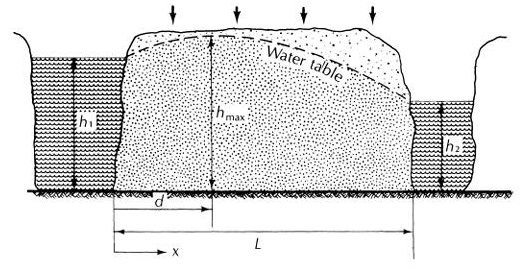
</div>

#### Calculation of head at position X

$h=\sqrt{h_1^2-\frac{(h_1^2-h_2^2)x}{L}+\frac{w}{K}(L-x)x}$

where $w$ is the recharge rate

In [65]:
# parameters
L = 1000 # aquifer length, m
hmax = 10 # saturated thickness, m
zb = -5 # aquifer bottom, m
k = 25 # hydraulic conductivity, m/d
n = 0.3 # porosity, -
T = k * hmax # transmissivity, m^2/d
h1 = 6 # specified head at the left boundary, m
h2 = 5 # specified head at the right boundary, m
w = 0.003  # areal recharge, m/d

In [66]:
# solution
x = np.linspace(0, L, 100)
h = -w / (2 * T) * (x ** 2 - L * x) + (h2 - h1) * x / L + h1
Qx = w * (x - L / 2) - T * (h2 - h1) / L 

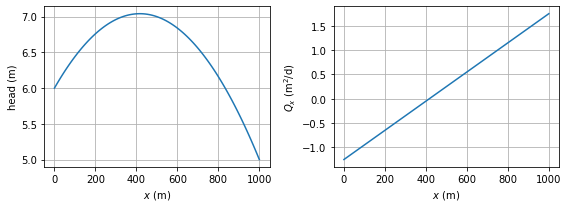

In [67]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot(x, Qx)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)');

In [53]:
print(f'discharge into left river: {-Qx[0]:.3f} m^2/d')
print(f'discharge into right river: {Qx[-1]:.3f} m^2/d')

discharge into left river: 0.250 m^2/d
discharge into right river: 0.750 m^2/d


In [54]:
# solution
xg, zg = np.meshgrid(np.linspace(0, L, 10), np.linspace(zb, zb + hmax, 5))
qx = (w * (xg - L / 2) - T * (h2 - h1) / L) / hmax
qz = - w * (zg - zb) / hmax

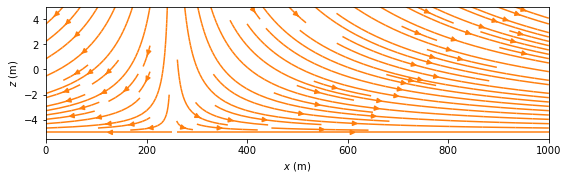

In [55]:
# basic stream plot
plt.subplot(111, aspect=25)
plt.streamplot(xg, zg, qx, qz, color='C1')
plt.xlabel('$x$ (m)')
plt.ylabel('$z$ (m)');

In [16]:
# solution
x = np.linspace(0, L, 100)
Qx = w * (x - L / 2) - T * (h2 - h1) / L 
psi = np.zeros((2, len(x)))
psi[1, :] = -Qx # at the top of the aquifer, the stream function is -Qx
xg = x
zg = [zb, zb + hmax]

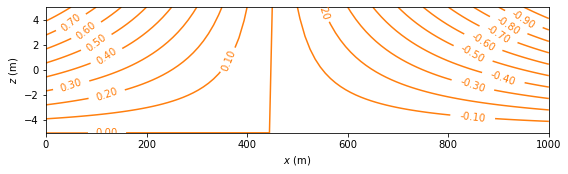

In [17]:
# basic streamline plot
plt.subplot(111, aspect=25)
cs = plt.contour(xg, zg, psi, 20, colors='C1', linestyles='-')
plt.clabel(cs, fmt='%1.2f')
plt.xlabel('$x$ (m)')
plt.ylabel('$z$ (m)');